In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# using ggplot style
plt.style.use("ggplot")
# setting width and height of plot
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras

# load dataset
data = pd.read_csv("/content/01.csv", delimiter=";")
data.head(10)

Timestamp  CPU cores  CPU capacity provisioned [MHZ]  \
0  04.01.2016 00:00:00          2                               0   
1  04.01.2016 00:05:00          2                               0   
2  04.01.2016 00:10:00          2                               0   
3  04.01.2016 00:15:00          2                               0   
4  04.01.2016 00:20:00          2                               0   
5  04.01.2016 00:25:00          2                               0   
6  04.01.2016 00:30:00          2                               0   
7  04.01.2016 00:35:00          2                               0   
8  04.01.2016 00:40:00          2                               0   
9  04.01.2016 00:45:00          2                               0   

   CPU usage [MHZ] CPU usage [%]  Memory capacity provisioned [KB]  \
0              115          2,51                           4194304   
1              106          2,32                           4194304   
2              119          2,61                           4194304   
3              121          2,63                           4194304   
4              112          2,46                           4194304   
5              117          2,56                           4194304   
6              107          2,33                           4194304   
7              113          2,47                           4194304   
8              110           2,4                           4194304   
9              117          2,55                           4194304   

   Memory usage [KB] Memory usage [%]  Disk read throughput [KB/s]  \
0             122474             2,92                            0   
1             119538             2,85                            0   
2             329253             7,85                            0   
3             284793             6,79                            0   
4             348966             8,32                            0   
5             326736             7,79                            0   
6             270533             6,45                            0   
7             340577             8,12                            0   
8             281857             6,72                            0   
9             192519             4,59                            0   

   Disk write throughput [KB/s]  Disk size [GB]  \
0                            13              54   
1                            13              54   
2                            70              54   
3                            13              54   
4                            10              54   
5                            14              54   
6                            13              54   
7                            13              54   
8                            12              54   
9                            14              54   

   Network received throughput [KB/s]  Network transmitted throughput [KB/s]  
0                                   1                                      1  
1                                   1                                      1  
2                                   2                                     35  
3                                  11                                     35  
4                                   1                                      1  
5                                  11                                     37  
6                                   1                                      1  
7                                  11                                     36  
8                                   1                                      1  
9                                  11                                     36

In [ ]:
# # change the year from 2016 to 2020
data['Timestamp'] = data['Timestamp'].str.replace('2016','2020')
data.set_index('Timestamp', inplace=True)
data

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
04.01.2020 00:00:00          2                               0   
04.01.2020 00:05:00          2                               0   
04.01.2020 00:10:00          2                               0   
04.01.2020 00:15:00          2                               0   
04.01.2020 00:20:00          2                               0   
...                        ...                             ...   
08.02.2020 23:35:00          2                               0   
08.02.2020 23:40:00          2                               0   
08.02.2020 23:45:00          2                               0   
08.02.2020 23:50:00          2                               0   
08.02.2020 23:55:00          2                               0   

                     CPU usage [MHZ] CPU usage [%]  \
Timestamp                                            
04.01.2020 00:00:00              115          2,51   
04.01.2020 00:05:00              106          2,32   
04.01.2020 00:10:00              119          2,61   
04.01.2020 00:15:00              121          2,63   
04.01.2020 00:20:00              112          2,46   
...                              ...           ...   
08.02.2020 23:35:00              120          2,62   
08.02.2020 23:40:00              114          2,49   
08.02.2020 23:45:00              116          2,53   
08.02.2020 23:50:00              116          2,54   
08.02.2020 23:55:00              122          2,66   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
04.01.2020 00:00:00                           4194304             122474   
04.01.2020 00:05:00                           4194304             119538   
04.01.2020 00:10:00                           4194304             329253   
04.01.2020 00:15:00                           4194304             284793   
04.01.2020 00:20:00                           4194304             348966   
...                                               ...                ...   
08.02.2020 23:35:00                           4194304             471859   
08.02.2020 23:40:00                           4194304             343513   
08.02.2020 23:45:00                           4194304              83467   
08.02.2020 23:50:00                           4194304              83467   
08.02.2020 23:55:00                           4194304             127926   

                    Memory usage [%]  Disk read throughput [KB/s]  \
Timestamp                                                           
04.01.2020 00:00:00             2,92                            0   
04.01.2020 00:05:00             2,85                            0   
04.01.2020 00:10:00             7,85                            0   
04.01.2020 00:15:00             6,79                            0   
04.01.2020 00:20:00             8,32                            0   
...                              ...                          ...   
08.02.2020 23:35:00            11,25                            0   
08.02.2020 23:40:00             8,19                            0   
08.02.2020 23:45:00             1,99                            0   
08.02.2020 23:50:00             1,99                            0   
08.02.2020 23:55:00             3,05                            0   

                     Disk write throughput [KB/s]  Disk size [GB]  \
Timestamp                                                           
04.01.2020 00:00:00                            13              54   
04.01.2020 00:05:00                            13              54   
04.01.2020 00:10:00                            70              54   
04.01.2020 00:15:00                            13              54   
04.01.2020 00:20:00                            10              54   
...                                           ...             ...   
08.02.2020 23:35:00 

In [ ]:
# # change the year from 2016 to 2020 by converting to datetime first
# data['Timestamp'] = pd.to_datetime(data['Timestamp'])
# data['Timestamp'] = data['Timestamp'].mask(data['Timestamp'].dt.year == 2016, 
#                              data['Timestamp'] + pd.offsets.DateOffset(year=2020))
# data.set_index('Timestamp', inplace=True)
# data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10368 entries, 04.01.2020 00:00:00 to 08.02.2020 23:55:00
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   CPU cores                              10368 non-null  int64 
 1   CPU capacity provisioned [MHZ]         10368 non-null  int64 
 2   CPU usage [MHZ]                        10368 non-null  int64 
 3   CPU usage [%]                          10368 non-null  object
 4   Memory capacity provisioned [KB]       10368 non-null  int64 
 5   Memory usage [KB]                      10368 non-null  int64 
 6   Memory usage [%]                       10368 non-null  object
 7   Disk read throughput [KB/s]            10368 non-null  int64 
 8   Disk write throughput [KB/s]           10368 non-null  int64 
 9   Disk size [GB]                         10368 non-null  int64 
 10  Network received throughput [KB/s]     10368 non-null  

In [ ]:
# clean the cpu usage % columns, replace , with . for decimal
data['CPU usage [%]'] = data['CPU usage [%]'].str.replace(',','.')
data['Memory usage [%]'] = data['Memory usage [%]'].str.replace(',','.')

# convert to float
data['CPU usage [%]'] = pd.to_numeric(data['CPU usage [%]'], downcast="float")
data['Memory usage [%]'] = pd.to_numeric(data['Memory usage [%]'], downcast="float")
data

CPU cores  CPU capacity provisioned [MHZ]  \
Timestamp                                                        
04.01.2020 00:00:00          2                               0   
04.01.2020 00:05:00          2                               0   
04.01.2020 00:10:00          2                               0   
04.01.2020 00:15:00          2                               0   
04.01.2020 00:20:00          2                               0   
...                        ...                             ...   
08.02.2020 23:35:00          2                               0   
08.02.2020 23:40:00          2                               0   
08.02.2020 23:45:00          2                               0   
08.02.2020 23:50:00          2                               0   
08.02.2020 23:55:00          2                               0   

                     CPU usage [MHZ]  CPU usage [%]  \
Timestamp                                             
04.01.2020 00:00:00              115           2.51   
04.01.2020 00:05:00              106           2.32   
04.01.2020 00:10:00              119           2.61   
04.01.2020 00:15:00              121           2.63   
04.01.2020 00:20:00              112           2.46   
...                              ...            ...   
08.02.2020 23:35:00              120           2.62   
08.02.2020 23:40:00              114           2.49   
08.02.2020 23:45:00              116           2.53   
08.02.2020 23:50:00              116           2.54   
08.02.2020 23:55:00              122           2.66   

                     Memory capacity provisioned [KB]  Memory usage [KB]  \
Timestamp                                                                  
04.01.2020 00:00:00                           4194304             122474   
04.01.2020 00:05:00                           4194304             119538   
04.01.2020 00:10:00                           4194304             329253   
04.01.2020 00:15:00                           4194304             284793   
04.01.2020 00:20:00                           4194304             348966   
...                                               ...                ...   
08.02.2020 23:35:00                           4194304             471859   
08.02.2020 23:40:00                           4194304             343513   
08.02.2020 23:45:00                           4194304              83467   
08.02.2020 23:50:00                           4194304              83467   
08.02.2020 23:55:00                           4194304             127926   

                     Memory usage [%]  Disk read throughput [KB/s]  \
Timestamp                                                            
04.01.2020 00:00:00              2.92                            0   
04.01.2020 00:05:00              2.85                            0   
04.01.2020 00:10:00              7.85                            0   
04.01.2020 00:15:00              6.79                            0   
04.01.2020 00:20:00              8.32                            0   
...                               ...                          ...   
08.02.2020 23:35:00             11.25                            0   
08.02.2020 23:40:00              8.19                            0   
08.02.2020 23:45:00              1.99                            0   
08.02.2020 23:50:00              1.99                            0   
08.02.2020 23:55:00              3.05                            0   

                     Disk write throughput [KB/s]  Disk size [GB]  \
Timestamp                                                           
04.01.2020 00:00:00                            13              54   
04.01.2020 00:05:00                            13              54   
04.01.2020 00:10:00                            70              54   
04.01.2020 00:15:00                            13              54   
04.01.2020 00:20:00                            10              54   
...                                           ...             .

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10368 entries, 04.01.2020 00:00:00 to 08.02.2020 23:55:00
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CPU cores                              10368 non-null  int64  
 1   CPU capacity provisioned [MHZ]         10368 non-null  int64  
 2   CPU usage [MHZ]                        10368 non-null  int64  
 3   CPU usage [%]                          10368 non-null  float32
 4   Memory capacity provisioned [KB]       10368 non-null  int64  
 5   Memory usage [KB]                      10368 non-null  int64  
 6   Memory usage [%]                       10368 non-null  float32
 7   Disk read throughput [KB/s]            10368 non-null  int64  
 8   Disk write throughput [KB/s]           10368 non-null  int64  
 9   Disk size [GB]                         10368 non-null  int64  
 10  Network received throughput [KB/s]     1036

In [ ]:
# Check if Null values exist in data
data.isnull().sum()

CPU cores                                0
CPU capacity provisioned [MHZ]           0
CPU usage [MHZ]                          0
CPU usage [%]                            0
Memory capacity provisioned [KB]         0
Memory usage [KB]                        0
Memory usage [%]                         0
Disk read throughput [KB/s]              0
Disk write throughput [KB/s]             0
Disk size [GB]                           0
Network received throughput [KB/s]       0
Network transmitted throughput [KB/s]    0
dtype: int64

In [ ]:
# dataset stats
data.describe()

CPU cores  CPU capacity provisioned [MHZ]  CPU usage [MHZ]  \
count    10368.0                         10368.0     10368.000000   
mean         2.0                             0.0      1866.866995   
std          0.0                             0.0      1510.143173   
min          2.0                             0.0        95.000000   
25%          2.0                             0.0       122.000000   
50%          2.0                             0.0      2524.000000   
75%          2.0                             0.0      2542.000000   
max          2.0                             0.0      5065.000000   

       CPU usage [%]  Memory capacity provisioned [KB]  Memory usage [KB]  \
count   10368.000000                           10368.0       1.036800e+04   
mean       39.788803                         4194304.0       4.916753e+05   
std        31.148638                               0.0       2.568224e+05   
min         2.080000                         4194304.0       4.697600e+04   
25%         2.660000                         4194304.0       3.124760e+05   
50%        54.939999                         4194304.0       4.634710e+05   
75%        55.349998                         4194304.0       6.228540e+05   
max       100.000000                         4194304.0       2.189007e+06   

       Memory usage [%]  Disk read throughput [KB/s]  \
count      10368.000000                 10368.000000   
mean          11.722609                     7.087481   
std            6.123126                   247.226665   
min            1.120000                     0.000000   
25%            7.450000                     0.000000   
50%           11.050000                     0.000000   
75%           14.850000                     0.000000   
max           52.189999                 14389.000000   

       Disk write throughput [KB/s]  Disk size [GB]  \
count                  10368.000000         10368.0   
mean                      13.846933            54.0   
std                       17.640664             0.0   
min                        7.000000            54.0   
25%                       12.000000            54.0   
50%                       13.000000            54.0   
75%                       14.000000            54.0   
max                     1504.000000            54.0   

       Network received throughput [KB/s]  \
count                        10368.000000   
mean                            10.768422   
std                             41.255477   
min                              0.000000   
25%                              1.000000   
50%                              1.000000   
75%                             11.000000   
max                           1395.000000   

       Network transmitted throughput [KB/s]  
count                           10368.000000  
mean                               18.819348  
std                               140.301054  
min                                 0.000000  
25%                                 1.000000  
50%                                 1.000000  
75%                                35.000000  
max                              6761.000000

In [ ]:
# Remove the unnecessary columns
data = data[data.columns.difference(['CPU cores', 'CPU capacity provisioned [MHZ]', 'Memory capacity provisioned [KB]', 'Disk size [GB]'])]
data

CPU usage [%]  CPU usage [MHZ]  \
Timestamp                                             
04.01.2020 00:00:00           2.51              115   
04.01.2020 00:05:00           2.32              106   
04.01.2020 00:10:00           2.61              119   
04.01.2020 00:15:00           2.63              121   
04.01.2020 00:20:00           2.46              112   
...                            ...              ...   
08.02.2020 23:35:00           2.62              120   
08.02.2020 23:40:00           2.49              114   
08.02.2020 23:45:00           2.53              116   
08.02.2020 23:50:00           2.54              116   
08.02.2020 23:55:00           2.66              122   

                     Disk read throughput [KB/s]  \
Timestamp                                          
04.01.2020 00:00:00                            0   
04.01.2020 00:05:00                            0   
04.01.2020 00:10:00                            0   
04.01.2020 00:15:00                            0   
04.01.2020 00:20:00                            0   
...                                          ...   
08.02.2020 23:35:00                            0   
08.02.2020 23:40:00                            0   
08.02.2020 23:45:00                            0   
08.02.2020 23:50:00                            0   
08.02.2020 23:55:00                            0   

                     Disk write throughput [KB/s]  Memory usage [%]  \
Timestamp                                                             
04.01.2020 00:00:00                            13              2.92   
04.01.2020 00:05:00                            13              2.85   
04.01.2020 00:10:00                            70              7.85   
04.01.2020 00:15:00                            13              6.79   
04.01.2020 00:20:00                            10              8.32   
...                                           ...               ...   
08.02.2020 23:35:00                            14             11.25   
08.02.2020 23:40:00                            12              8.19   
08.02.2020 23:45:00                            15              1.99   
08.02.2020 23:50:00                            12              1.99   
08.02.2020 23:55:00                            16              3.05   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   
08.02.2020 23:55:00             127926                                  11   

                     Network transmitted throughput [KB/s]  
Timestamp                                                   
04.01.2020 00:00:00                                      1  
04.01.2020 00:05:00                                      1  
04.01.2020 00:10:00                                     35  
04.01.2020 00:15:00                                     35  
04.01.2020 00:20:00                                      1  
...                                                    ...  
08.02.2020 23:35:00                                     35  
08.02.2020 23:40:00                                      0  
08.02.2020 23:45:00                                      1  
08.02.2020 23:50:0

Create target variable

In [ ]:
 # create target variable 
 def cpu_usage_label(df):
  '''Function to add target variable of the next cpu usage to the previous
  time step'''
  n = 1
  df['Target'] = df[['CPU usage [MHZ]']].shift(-n)
  return df

new_data = cpu_usage_label(data)

# remove last nan column
new_data = new_data[:-1]
new_data

CPU usage [%]  CPU usage [MHZ]  \
Timestamp                                             
04.01.2020 00:00:00           2.51              115   
04.01.2020 00:05:00           2.32              106   
04.01.2020 00:10:00           2.61              119   
04.01.2020 00:15:00           2.63              121   
04.01.2020 00:20:00           2.46              112   
...                            ...              ...   
08.02.2020 23:30:00           2.73              125   
08.02.2020 23:35:00           2.62              120   
08.02.2020 23:40:00           2.49              114   
08.02.2020 23:45:00           2.53              116   
08.02.2020 23:50:00           2.54              116   

                     Disk read throughput [KB/s]  \
Timestamp                                          
04.01.2020 00:00:00                            0   
04.01.2020 00:05:00                            0   
04.01.2020 00:10:00                            0   
04.01.2020 00:15:00                            0   
04.01.2020 00:20:00                            0   
...                                          ...   
08.02.2020 23:30:00                            0   
08.02.2020 23:35:00                            0   
08.02.2020 23:40:00                            0   
08.02.2020 23:45:00                            0   
08.02.2020 23:50:00                            0   

                     Disk write throughput [KB/s]  Memory usage [%]  \
Timestamp                                                             
04.01.2020 00:00:00                            13              2.92   
04.01.2020 00:05:00                            13              2.85   
04.01.2020 00:10:00                            70              7.85   
04.01.2020 00:15:00                            13              6.79   
04.01.2020 00:20:00                            10              8.32   
...                                           ...               ...   
08.02.2020 23:30:00                            14              6.59   
08.02.2020 23:35:00                            14             11.25   
08.02.2020 23:40:00                            12              8.19   
08.02.2020 23:45:00                            15              1.99   
08.02.2020 23:50:00                            12              1.99   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:30:00             276405                                   1   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   

                     Network transmitted throughput [KB/s]  Target  
Timestamp                                                           
04.01.2020 00:00:00                                      1   106.0  
04.01.2020 00:05:00                                      1   119.0  
04.01.2020 00:10:00                                     35   121.0  
04.01.2020 00:15:00                                     35   112.0  
04.01.2020 00:20:00                                      1   117.0  
...                                                    ...     ...  
08.02.2020 23:30:00                                      1   120.0  
08.02.2020 23:35:00                                     35   114.0  

Check for correlation

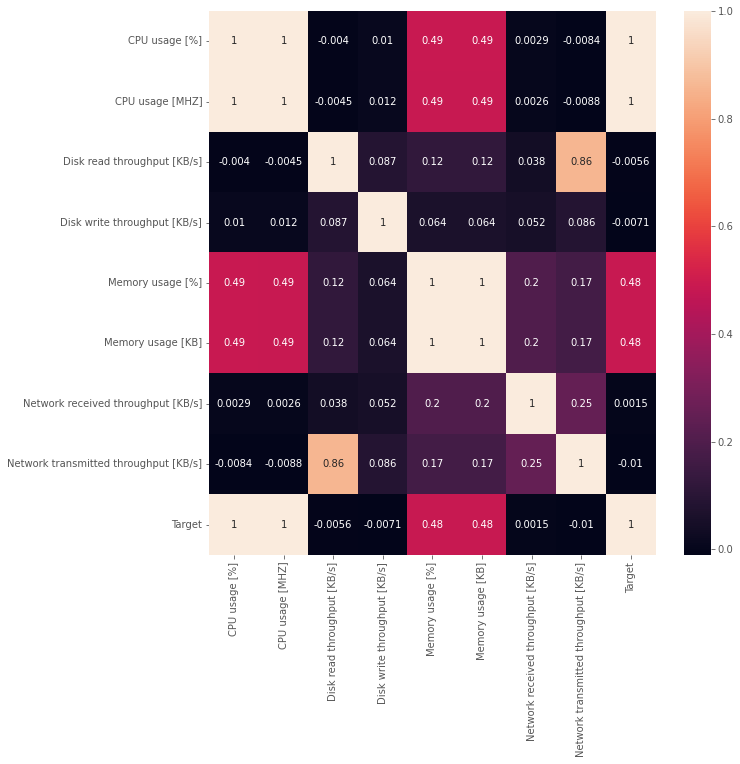

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(new_data.corr(), annot=True)

As expected, the CPU Usage [MHZ] and CPU Usage [%] columns are highly correlated. Also, the Memory Usage [KB] and Memory Usage [%] columns are highly correlated. We won’t use the Memory Usage [%] and CPU Usage [%] columns. There is also a high correlation between Network transmitted throughput and Disk read throughput. We'll use only the Network transmitted throughput variable to prevent colinearity .

In [ ]:
# Remove some features
new_data = new_data[new_data.columns.difference(['Memory usage [%]', 'CPU usage [%]', 'Disk read throughput [KB/s]'])]
new_data

CPU usage [MHZ]  Disk write throughput [KB/s]  \
Timestamp                                                            
04.01.2020 00:00:00              115                            13   
04.01.2020 00:05:00              106                            13   
04.01.2020 00:10:00              119                            70   
04.01.2020 00:15:00              121                            13   
04.01.2020 00:20:00              112                            10   
...                              ...                           ...   
08.02.2020 23:30:00              125                            14   
08.02.2020 23:35:00              120                            14   
08.02.2020 23:40:00              114                            12   
08.02.2020 23:45:00              116                            15   
08.02.2020 23:50:00              116                            12   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:30:00             276405                                   1   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   

                     Network transmitted throughput [KB/s]  Target  
Timestamp                                                           
04.01.2020 00:00:00                                      1   106.0  
04.01.2020 00:05:00                                      1   119.0  
04.01.2020 00:10:00                                     35   121.0  
04.01.2020 00:15:00                                     35   112.0  
04.01.2020 00:20:00                                      1   117.0  
...                                                    ...     ...  
08.02.2020 23:30:00                                      1   120.0  
08.02.2020 23:35:00                                     35   114.0  
08.02.2020 23:40:00                                      0   116.0  
08.02.2020 23:45:00                                      1   116.0  
08.02.2020 23:50:00                                      1   122.0  

[10367 rows x 6 columns]

Create a function to normalize the data

In [ ]:
# # Function to normalize data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))

# def normalize(df):
#   # transform all columns
#   x = scaler.fit_transform(df)
#   # convert the numpy array back to a dataframe and join the timestamp column to it
#   x = pd.DataFrame(x, columns=new_data.columns)
#   # add the timestamp column as index in the normalized columns
#   x.set_index(new_data.index, inplace=True)
#   return x

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_cpu_plot(df, title):
  '''df: Pandas Dataframe
     title: str, title of the plot'''
  fig = px.line(title=title)
  for i in df[['CPU usage [MHZ]']]:
    fig.add_scatter(x=df.index, y=df[i], name=i)
  fig.show()

In [ ]:
# plot interactive chart for VM data
interactive_cpu_plot(new_data, 'CPU Utilization')

In [ ]:
# # plot interactive chart for VM data
# interactive_cpu_plot(normalize(new_data), 'Normalized CPU Utilization')

### Do Exploratory Data Analysis

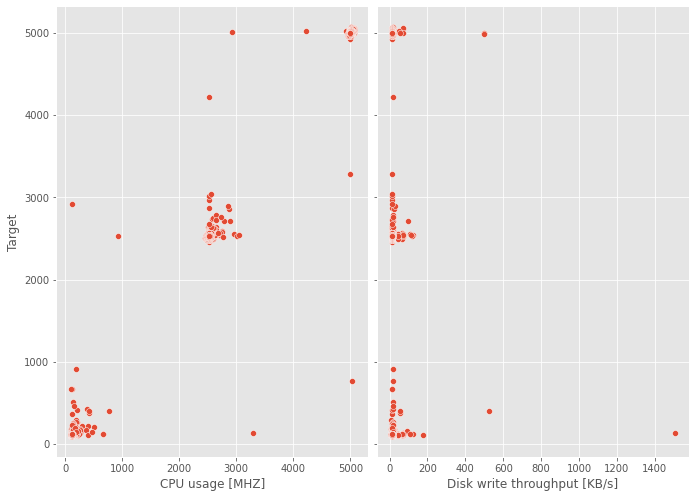

In [ ]:
sns.pairplot(new_data, x_vars=['CPU usage [MHZ]', 'Disk write throughput [KB/s]'],
             y_vars='Target', height=7, aspect=0.7)

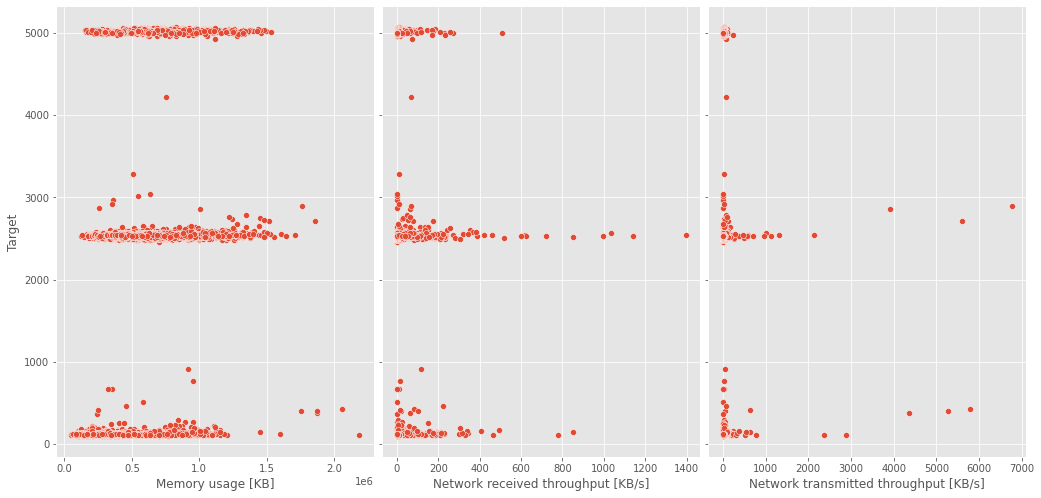

In [ ]:
sns.pairplot(new_data, x_vars=['Memory usage [KB]', 'Network received throughput [KB/s]',
                               'Network transmitted throughput [KB/s]'],
             y_vars='Target', height=7, aspect=0.7)

In [ ]:
# normalize the data
# scaled_data = normalize(new_data)  # let's try without scaling
scaled_data = new_data
scaled_data

CPU usage [MHZ]  Disk write throughput [KB/s]  \
Timestamp                                                            
04.01.2020 00:00:00              115                            13   
04.01.2020 00:05:00              106                            13   
04.01.2020 00:10:00              119                            70   
04.01.2020 00:15:00              121                            13   
04.01.2020 00:20:00              112                            10   
...                              ...                           ...   
08.02.2020 23:30:00              125                            14   
08.02.2020 23:35:00              120                            14   
08.02.2020 23:40:00              114                            12   
08.02.2020 23:45:00              116                            15   
08.02.2020 23:50:00              116                            12   

                     Memory usage [KB]  Network received throughput [KB/s]  \
Timestamp                                                                    
04.01.2020 00:00:00             122474                                   1   
04.01.2020 00:05:00             119538                                   1   
04.01.2020 00:10:00             329253                                   2   
04.01.2020 00:15:00             284793                                  11   
04.01.2020 00:20:00             348966                                   1   
...                                ...                                 ...   
08.02.2020 23:30:00             276405                                   1   
08.02.2020 23:35:00             471859                                  11   
08.02.2020 23:40:00             343513                                   0   
08.02.2020 23:45:00              83467                                   1   
08.02.2020 23:50:00              83467                                   0   

                     Network transmitted throughput [KB/s]  Target  
Timestamp                                                           
04.01.2020 00:00:00                                      1   106.0  
04.01.2020 00:05:00                                      1   119.0  
04.01.2020 00:10:00                                     35   121.0  
04.01.2020 00:15:00                                     35   112.0  
04.01.2020 00:20:00                                      1   117.0  
...                                                    ...     ...  
08.02.2020 23:30:00                                      1   120.0  
08.02.2020 23:35:00                                     35   114.0  
08.02.2020 23:40:00                                      0   116.0  
08.02.2020 23:45:00                                      1   116.0  
08.02.2020 23:50:00                                      1   122.0  

[10367 rows x 6 columns]

In [ ]:
scaled_data.shape

(10367, 6)

In [ ]:
# Create Feature and Target
X = scaled_data.iloc[:, :-1].values
y = scaled_data.iloc[:, -1].values
print(X)
print(y, end='\n\n')

print('The shape of the features is {}'.format(X.shape))
print('The shape of the target variable is {}'.format(y.shape))

[[   115     13 122474      1      1]
 [   106     13 119538      1      1]
 [   119     70 329253      2     35]
 ...
 [   114     12 343513      0      0]
 [   116     15  83467      1      1]
 [   116     12  83467      0      1]]
[106. 119. 121. ... 116. 116. 122.]

The shape of the features is (10367, 5)
The shape of the target variable is (10367,)


In [ ]:
# split data into training and test set
# using train_test_split will shuffle the data,
# except you set the shuffle parameter to False
split = int(0.75 * len(X))
split

X_train = X[:split]
print('The shape of X_train is {}'.format(X_train.shape))

y_train = y[:split]
print('The shape of y_train is {}'.format(y_train.shape))

X_test = X[split:]
print('The shape of X_test is {}'.format(X_test.shape))

y_test = y[split:]
print('The shape of y_test is {}'.format(y_test.shape))

The shape of X_train is (7775, 5)
The shape of y_train is (7775,)
The shape of X_test is (2592, 5)
The shape of y_test is (2592,)


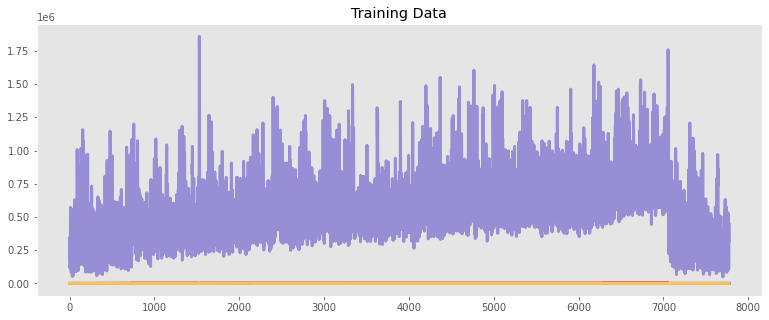

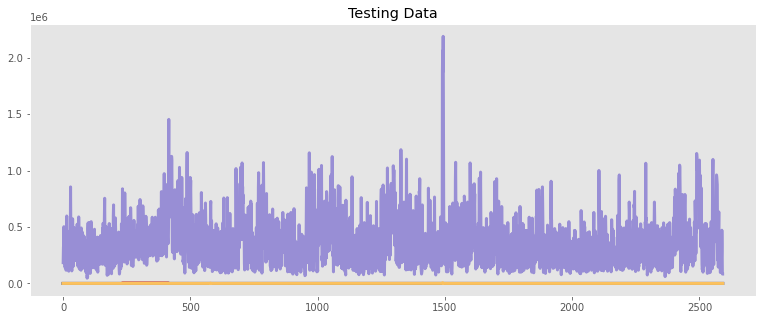

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize=(13, 5))
  plt.plot(data, linewidth=3)
  plt.title(title)
  plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_test, "Testing Data")

In [ ]:
# Function to plot model's prediction against actual value
def plot_pred(df, title):
  fig = px.line(title=title)
  for i in df.columns:
    fig.add_scatter(x=df.index, y=df[i], name=i)
  fig.show()

# Ridge Regression

R Squared on Training Set:  0.9977373545065716
RMSE of Ridge Regressor [Training set]:  0.13677516385117455
R Squared on Test Set:  0.9949136800510101
RMSE of Ridge Regressor [Test set]:  0.274006304090878


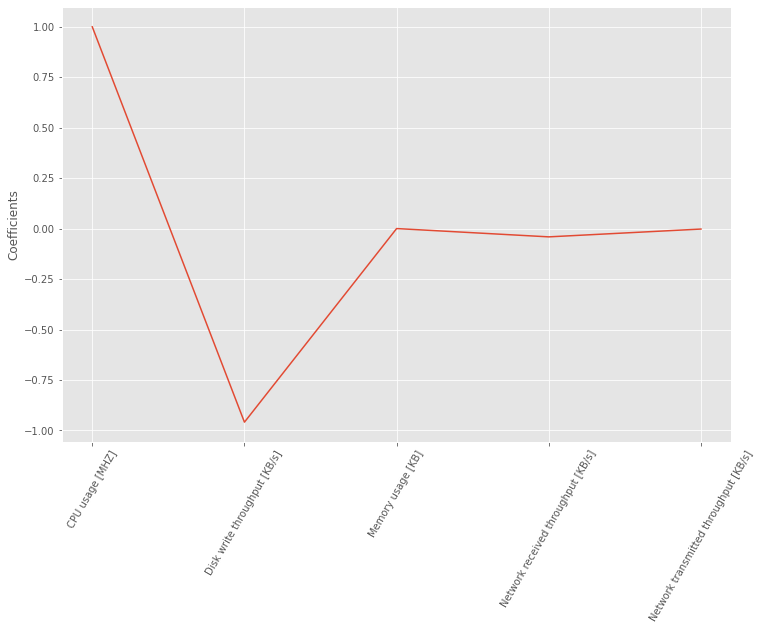

[ 9.99158953e-01 -9.58808529e-01 -5.40262161e-06 -4.11369653e-02
 -2.42730497e-03]


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error as MSE

features = new_data.columns.difference(['Target'])

# fit model to training data
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_1 = ridge_model.predict(X_test)
print("R Squared on Training Set: ", ridge_model.score(X_train, y_train))
print("RMSE of Ridge Regressor [Training set]: ", np.sqrt(MSE(y_train, ridge_model.predict(X_train))))
print("R Squared on Test Set: ", ridge_model.score(X_test, y_test))
print("RMSE of Ridge Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_1)))

# plot the coefficients as a function of the feature names
_ = plt.plot(range(len(features)), ridge_model.coef_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
print(ridge_model.coef_)

In [ ]:
# Make Prediction
predicted_cpu_usage = ridge_model.predict(X)
print("Prediction on the entire dataset", predicted_cpu_usage)

# function to add predicted value and actual value in a dataframe
def actual_vs_predicted(dataset, actual, prediction):
  '''dataset: dataframe, extract the timestamp from the dataset
     actual: list, target value
     prediction: list, model's predictions'''
  # Create a dataframe based on the timestamp, showing actual cpu usage and predicted cpu usage
  df_predicted = pd.DataFrame()
  # Add the actual values to the dataframe
  df_predicted["Actual"] = actual
  # Add the predicted values to the dataframe
  df_predicted["Prediction"] = prediction
  df_predicted.set_index(dataset.index, inplace=True)
  return df_predicted


df_predicted = actual_vs_predicted(new_data, y, predicted_cpu_usage)
display(df_predicted)

filename = 'ridge_cpu.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (Ridge)")

Prediction on the entire dataset [120.12156732 111.14499884  68.22530296 ... 118.93059109 119.41384928
 122.33141183]


Actual  Prediction
Timestamp                              
04.01.2020 00:00:00   106.0  120.121567
04.01.2020 00:05:00   119.0  111.144999
04.01.2020 00:10:00   121.0   68.225303
04.01.2020 00:15:00   112.0  124.745675
04.01.2020 00:20:00   117.0  118.776865
...                     ...         ...
08.02.2020 23:30:00   120.0  128.322717
08.02.2020 23:35:00   114.0  121.777061
08.02.2020 23:40:00   116.0  118.930591
08.02.2020 23:45:00   116.0  119.413849
08.02.2020 23:50:00   122.0  122.331412

[10367 rows x 2 columns]

Dataframe has been saved to excel file


# Lasso Regression

R Squared on Training Set:  0.9977373545065602
RMSE of Lasso Regressor [Training set]:  0.13677510800375725
R Squared on Test Set:  0.994913662813804
RMSE of Lasso Regressor [Test set]:  0.27400627012216583


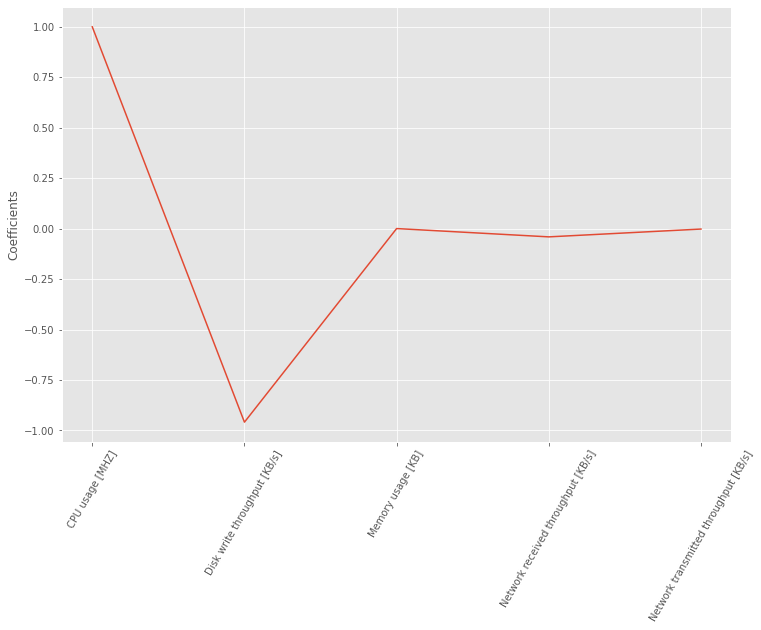

[ 9.99158965e-01 -9.58792170e-01 -5.40271064e-06 -4.11362869e-02
 -2.42743067e-03]


In [ ]:
from sklearn.linear_model import Lasso

# fit model to training data
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_2 = lasso_model.predict(X_test)
print("R Squared on Training Set: ", lasso_model.score(X_train, y_train))
print("RMSE of Lasso Regressor [Training set]: ", np.sqrt(MSE(y_train, lasso_model.predict(X_train))))
print("R Squared on Test Set: ", lasso_model.score(X_test, y_test))
print("RMSE of Lasso Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_2)))

# plot the coefficients as a function of the feature names
_ = plt.plot(range(len(features)), lasso_model.coef_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
print(lasso_model.coef_)

In [ ]:
predicted_cpu_usage = lasso_model.predict(X)

df_predicted = actual_vs_predicted(new_data, y, predicted_cpu_usage)
display(df_predicted)

filename = 'lasso_cpu.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (Lasso)")

Actual  Prediction
Timestamp                              
04.01.2020 00:00:00   106.0  120.121565
04.01.2020 00:05:00   119.0  111.144996
04.01.2020 00:10:00   121.0   68.226211
04.01.2020 00:15:00   112.0  124.745660
04.01.2020 00:20:00   117.0  118.776794
...                     ...         ...
08.02.2020 23:30:00   120.0  128.322717
08.02.2020 23:35:00   114.0  121.777046
08.02.2020 23:40:00   116.0  118.930552
08.02.2020 23:45:00   116.0  119.413883
08.02.2020 23:50:00   122.0  122.331396

[10367 rows x 2 columns]

Dataframe has been saved to excel file


# RandomForest Regressor

R Squared on Training Set:  0.9994304571499147
RMSE of RandomForest Regressor [Training set]:  0.0817729209775155
R Squared on Test Set:  0.9929376492337317
RMSE of RandomForest Regressor [Test set]:  0.2839885556460163


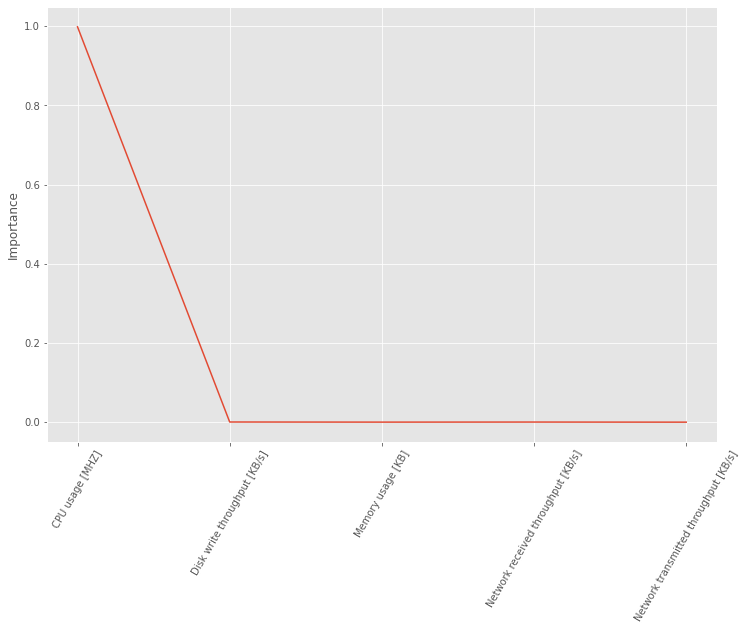

[9.98635324e-01 5.43138015e-04 2.47853274e-04 4.19382350e-04
 1.54302134e-04]


In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=50,
                           random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Evaluate of Validation Data
y_pred_3 = rf.predict(X_test)
print("R Squared on Training Set: ", rf.score(X_train, y_train))
print("RMSE of RandomForest Regressor [Training set]: ", np.sqrt(MSE(y_train, rf.predict(X_train))))
print("R Squared on Test Set: ", rf.score(X_test, y_test))
print("RMSE of RandomForest Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_3)))

# plot the feature importance of the rf model
_ = plt.plot(range(len(features)), rf.feature_importances_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Importance')
plt.show()
print(rf.feature_importances_)

In [ ]:
# Make Prediction
predicted_cpu_usage = rf.predict(X)

df_predicted = actual_vs_predicted(new_data, y, predicted_cpu_usage)
display(df_predicted)

filename = 'randomforest_cpu.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (Random Forest Regressor)")

Actual  Prediction
Timestamp                              
04.01.2020 00:00:00   106.0  111.030000
04.01.2020 00:05:00   119.0  118.760000
04.01.2020 00:10:00   121.0  120.100000
04.01.2020 00:15:00   112.0  113.960000
04.01.2020 00:20:00   117.0  117.020000
...                     ...         ...
08.02.2020 23:30:00   120.0  118.580000
08.02.2020 23:35:00   114.0  115.340000
08.02.2020 23:40:00   116.0  121.783333
08.02.2020 23:45:00   116.0  120.130000
08.02.2020 23:50:00   122.0  118.646667

[10367 rows x 2 columns]

Dataframe has been saved to excel file


# XGBoost

In [ ]:
from xgboost import XGBRegressor

# check for the best number of n_estimators
xgboost_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, n_jobs=-1)
xgboost_model.fit(X_train, y_train,
                  early_stopping_rounds=200,
                  eval_set=[(X_test, y_test)],
                  verbose=True)

[44]	validation_0-rmse:849.95
[45]	validation_0-rmse:841.526
[46]	validation_0-rmse:833.187
[47]	validation_0-rmse:824.932
[48]	validation_0-rmse:816.761
[49]	validation_0-rmse:808.674
[50]	validation_0-rmse:800.671
[51]	validation_0-rmse:792.745
[52]	validation_0-rmse:784.899
[53]	validation_0-rmse:777.136
[54]	validation_0-rmse:769.452
[55]	validation_0-rmse:761.84
[56]	validation_0-rmse:754.31
[57]	validation_0-rmse:746.861
[58]	validation_0-rmse:739.479
[59]	validation_0-rmse:732.173
[60]	validation_0-rmse:724.951
[61]	validation_0-rmse:717.789
[62]	validation_0-rmse:710.711
[63]	validation_0-rmse:703.699
[64]	validation_0-rmse:696.755
[65]	validation_0-rmse:689.895
[66]	validation_0-rmse:683.089
[67]	validation_0-rmse:676.361
[68]	validation_0-rmse:669.7
[69]	validation_0-rmse:663.107
[70]	validation_0-rmse:656.58
[71]	validation_0-rmse:650.122
[72]	validation_0-rmse:643.728
[73]	validation_0-rmse:637.399
[74]	validation_0-rmse:631.135
[75]	validation_0-rmse:624.937
[76]	validatio

XGBRegressor(learning_rate=0.01, n_estimators=1000, n_jobs=-1)

[16:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R Squared on Training Set:  0.9983950394934209
RMSE of XGBoost Regressor [Training set]:  0.12305822431361726
R Squared on Test Set:  0.9937900183887319
RMSE of XGBoost Regressor [Test set]:  0.251914439516222


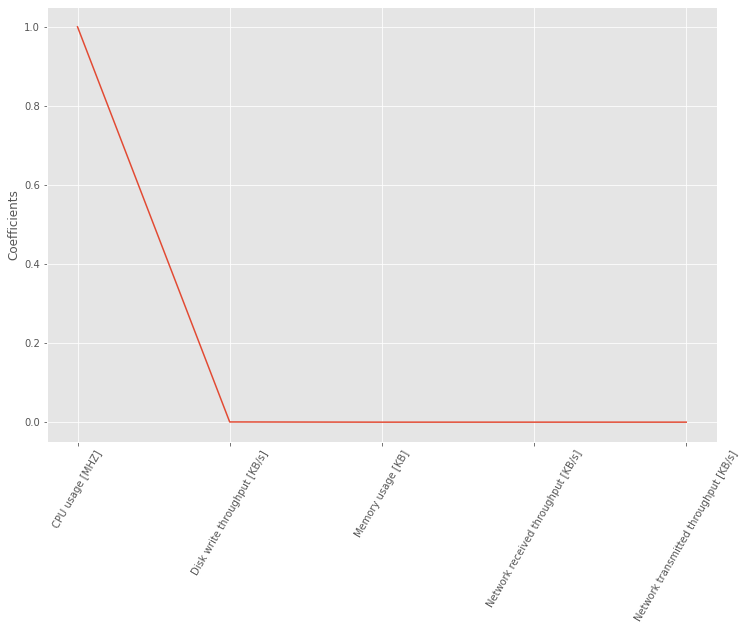

[9.9924856e-01 5.7470944e-04 4.3129938e-05 6.1127321e-05 7.2636147e-05]


In [ ]:
# fit model to training data
from xgboost import XGBRegressor
xgboost_model = XGBRegressor(n_estimators=524, learning_rate=0.01)
xgboost_model.fit(X_train, y_train)

# Evaluate of Validation Data
y_pred_5 = xgboost_model.predict(X_test)
print("R Squared on Training Set: ", xgboost_model.score(X_train, y_train))
print("RMSE of XGBoost Regressor [Training set]: ", np.sqrt(MSE(y_train, xgboost_model.predict(X_train))))
print("R Squared on Test Set: ", xgboost_model.score(X_test, y_test))
print("RMSE of XGBoost Regressor [Test set]: ", np.sqrt(MSE(y_test, y_pred_5)))

# plot the coefficients as a function of the feature names
_ = plt.plot(range(len(features)), xgboost_model.feature_importances_)
_ = plt.xticks(range(len(features)), features, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()
print(xgboost_model.feature_importances_)

In [ ]:
# Make Prediction
predicted_cpu_usage = xgboost_model.predict(X)

df_predicted = actual_vs_predicted(new_data, y, predicted_cpu_usage)
display(df_predicted)

filename = 'xgboost_cpu.xlsx'
df_predicted.to_excel(filename)
print("Dataframe has been saved to excel file")

# Plot the results
plot_pred(df_predicted, "Original vs. Predictions (XGBoost Regressor)")

Actual  Prediction
Timestamp                              
04.01.2020 00:00:00   106.0  119.297615
04.01.2020 00:05:00   119.0  114.877510
04.01.2020 00:10:00   121.0  116.894562
04.01.2020 00:15:00   112.0  118.639885
04.01.2020 00:20:00   117.0  116.565315
...                     ...         ...
08.02.2020 23:30:00   120.0  121.459793
08.02.2020 23:35:00   114.0  118.639885
08.02.2020 23:40:00   116.0  119.263603
08.02.2020 23:45:00   116.0  120.238075
08.02.2020 23:50:00   122.0  120.238075

[10367 rows x 2 columns]

Dataframe has been saved to excel file


## Using LSTMS

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
# adding extra dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((7775, 5, 1), (2592, 5, 1))

In [ ]:
# create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences=True)(inputs)
x = keras.layers.LSTM(150)(x)
# x = keras.layers.LSTM(150, return_sequences=True)(x)
outputs = keras.layers.Dense(1, activation='tanh')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 150)            91200     
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[
                    # Stopping our training if val_loss doesn't improve after 20 epochs
                    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=20),
                    # Saving the best weights of our model in the model directory
        
                    # We don't want to save just the weight, but also the model architecture
                    keras.callbacks.ModelCheckpoint('/content/model_{val_loss:.7f}.h5',
                                                       save_best_only=True,
                                                       save_weights_only=False,
                                                       monitor='val_loss')])

Epoch 1/100
243/243 [==============================] - 11s 25ms/step - loss: 7091452.5000 - root_mean_squared_error: 2662.9780 - val_loss: 1775556.7500 - val_root_mean_squared_error: 1332.5002
Epoch 2/100
243/243 [==============================] - 5s 21ms/step - loss: 7091421.0000 - root_mean_squared_error: 2662.9722 - val_loss: 1775556.7500 - val_root_mean_squared_error: 1332.5002
Epoch 3/100
243/243 [==============================] - 5s 20ms/step - loss: 7091418.0000 - root_mean_squared_error: 2662.9717 - val_loss: 1775556.7500 - val_root_mean_squared_error: 1332.5002
Epoch 4/100
243/243 [==============================] - 5s 21ms/step - loss: 7091420.5000 - root_mean_squared_error: 2662.9722 - val_loss: 1775556.7500 - val_root_mean_squared_error: 1332.5002
Epoch 5/100
243/243 [==============================] - 5s 21ms/step - loss: 7091421.5000 - root_mean_squared_error: 2662.9724 - val_loss: 1775556.7500 - val_root_mean_squared_error: 1332.5002
Epoch 6/100
243/243 [==================

In [ ]:
# Evaluate of Validation Data
from sklearn.metrics import r2_score
y_pred_2 = model.predict(X_test)
print("R Squared on Training Set: ", r2_score(y_train, model.predict(X_train)))
print("RMSE of LSTM [Training set]: ", np.sqrt(MSE(y_train, model.predict(X_train))))
print("R Squared on Test Set: ", r2_score(y_test, y_pred_2))
print("RMSE of LSTM [Test set]: ", np.sqrt(MSE(y_test, y_pred_2)))

R Squared on Training Set:  -3.301058649373945
RMSE of LSTM [Training set]:  0.9990819321919948
R Squared on Test Set:  -0.13898586507978417
RMSE of LSTM [Test set]:  0.9961384266393497


In [ ]:
model.predict(X_train).shape

(7775, 1)

In [ ]:
# Make Prediction
predicted_cpu_usage = model.predict(X)
print("Prediction on the entire dataset", predicted_cpu_usage)

# Append the predicted values into a list
predicted = []
for i in predicted_cpu_usage:
  predicted.append(i[0])
print("Total number of predictions made", len(predicted))

print("Total number of actual values in the dataset", len(y))
print("Actual values of cpu usage", y)

# Create a dataframe based on the timestamp, showing actual cpu usage and predicted cpu usage
df_predicted = pd.DataFrame()
# Add the actual values to the dataframe
# df_predicted["Actual"] = new_data['Target']
df_predicted["Actual"] = y
# Add the predicted values to the dataframe
df_predicted["Prediction"] = predicted
df_predicted.set_index(new_data.index, inplace=True)
df_predicted

Prediction on the entire dataset [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Total number of predictions made 10367
Total number of actual values in the dataset 10367
Actual values of cpu usage [106. 119. 121. ... 116. 116. 122.]


Actual  Prediction
Timestamp                              
04.01.2016 00:00:00   106.0         1.0
04.01.2016 00:05:00   119.0         1.0
04.01.2016 00:10:00   121.0         1.0
04.01.2016 00:15:00   112.0         1.0
04.01.2016 00:20:00   117.0         1.0
...                     ...         ...
08.02.2016 23:30:00   120.0         1.0
08.02.2016 23:35:00   114.0         1.0
08.02.2016 23:40:00   116.0         1.0
08.02.2016 23:45:00   116.0         1.0
08.02.2016 23:50:00   122.0         1.0

[10367 rows x 2 columns]

In [ ]:
# Plot the results
interactive_plot2(df_predicted, "Original vs. Predictions (LSTM)")

### From the correlation plot, only the CPU Usage and the Memory Usage have a strong relationship with the Target variable (Next CPU Utilized)


In [ ]:
new_data = new_data[["Timestamp", "CPU usage [MHZ]", "Memory usage [KB]", "Target"]]
new_data

Timestamp  CPU usage [MHZ]  Memory usage [KB]  Target
0      04.01.2016 00:00:00              115             122474   106.0
1      04.01.2016 00:05:00              106             119538   119.0
2      04.01.2016 00:10:00              119             329253   121.0
3      04.01.2016 00:15:00              121             284793   112.0
4      04.01.2016 00:20:00              112             348966   117.0
...                    ...              ...                ...     ...
10362  08.02.2016 23:30:00              125             276405   120.0
10363  08.02.2016 23:35:00              120             471859   114.0
10364  08.02.2016 23:40:00              114             343513   116.0
10365  08.02.2016 23:45:00              116              83467   116.0
10366  08.02.2016 23:50:00              116              83467   122.0

[10367 rows x 4 columns]

In [ ]:
# normalize the data after removing the timestamp column
scaled_data = scaler.fit_transform(new_data.drop(columns=["Timestamp"]))
scaled_data

array([[0.00402414, 0.03524599, 0.00221328],
       [0.00221328, 0.03387533, 0.00482897],
       [0.00482897, 0.13178007, 0.00523139],
       ...,
       [0.00382294, 0.13843731, 0.00422535],
       [0.00422535, 0.0170357 , 0.00422535],
       [0.00422535, 0.0170357 , 0.0054326 ]])

In [ ]:
scaled_data.shape

(10367, 3)

In [ ]:
# Create Feature and Target
X = scaled_data[:, :-1]
y = scaled_data[:, -1]
print(X)
print(y)

[[0.00402414 0.03524599]
 [0.00221328 0.03387533]
 [0.00482897 0.13178007]
 ...
 [0.00382294 0.13843731]
 [0.00422535 0.0170357 ]
 [0.00422535 0.0170357 ]]
[0.00221328 0.00482897 0.00523139 ... 0.00422535 0.00422535 0.0054326 ]


In [ ]:
print(X.shape)
print(y.shape)

(10367, 2)
(10367,)


In [ ]:
# split data into training and test set
# using train_test_split will shuffle the data, let's avoid that for now
# although I think we can set that parameter to False
split = int(0.75 * len(X))
split

7775

In [ ]:
X_train = X[:split]
X_train.shape

(7775, 2)

In [ ]:
y_train = y[:split]
y_train.shape

(7775,)

In [ ]:
X_test = X[split:]
X_test.shape

(2592, 2)

In [ ]:
y_test = y[split:]
y_test.shape

(2592,)

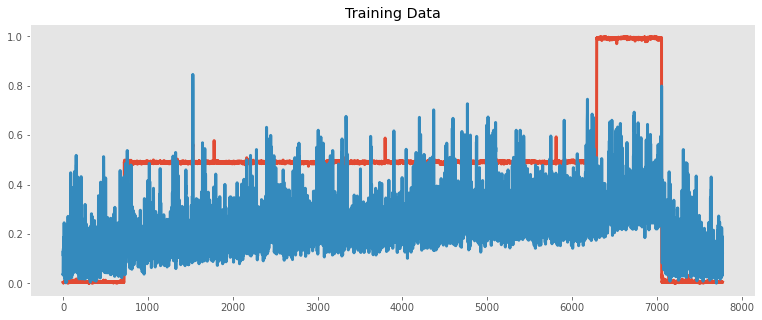

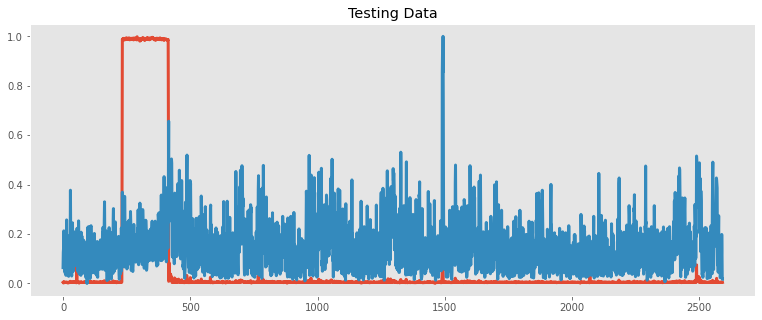

In [ ]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize=(13, 5))
  plt.plot(data, linewidth=3)
  plt.title(title)
  plt.grid()

show_plot(X_train, "Training Data")
show_plot(X_test, "Testing Data")

In [ ]:
# Create and train the Ridge Linear Regression  Model
# Note that Ridge regression performs linear least squares with L2 regularization.
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=1)
regressor.fit(X_train, y_train)

# Test the model and calculate its accuracy 
lr_accuracy = regressor.score(X_test, y_test)
print('Ridge Regression Score', lr_accuracy)

Ridge Regression Score 0.9932422555068283


In [ ]:
# Make Prediction
predicted_memory_usage = regressor.predict(X)
predicted_memory_usage

from sklearn.metrics import r2_score

print("R^2: ", r2_score(y, predicted_memory_usage))

R^2:  0.9975975716236178


In [ ]:
# Get the RMSE on the test set
from sklearn.metrics import mean_squared_error

print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))

RMSE on test set:  0.020651546834138345


In [ ]:
# Append the predicted values into a list
predicted = []
for i in predicted_memory_usage:
  predicted.append(i)
print(len(predicted))
print(predicted)

10367
[0.005607265719653023, 0.0038040989487395983, 0.006197833195281087, 0.00664482745845128, 0.004772799165205167, 0.00579904271602397, 0.0038498473848281164, 0.0049820938450981424, 0.004440287477921004, 0.005936764734574782, 0.006676676002315173, 0.00507088060438027, 0.005753294279935449, 0.008557137193713512, 0.005383467054714992, 0.005779244861609705, 0.005050954341316266, 0.005621469197459712, 0.005793749872769325, 0.005351921070318599, 0.005647291370484226, 0.0068713372623987875, 0.00665644717978367, 0.005016221533739706, 0.005721875678074229, 0.006814095461398489, 0.005632786359324603, 0.0072615196665713555, 0.005710255956741839, 0.007424763350908312, 0.005684432757602761, 0.005612861122375164, 0.005581442520513944, 0.005879826519156544, 0.007166707562564414, 0.006366799664875358, 0.005773219516884891, 0.005796332603129058, 0.0056188864670999785, 0.006369986488055525, 0.005633088918792102, 0.00541217451756674, 0.0060744877792401585, 0.006487179176836465, 0.005225818773100178, 0

In [ ]:
# Append the original memory usage values from the scaled data to a list
close = []
for i in scaled_data:
  close.append(i[-1])
len(close)
print(close)

[0.002213279678068409, 0.004828973843058349, 0.005231388329979877, 0.0034205231388329954, 0.0044265593561368215, 0.002414486921529173, 0.0036217303822937627, 0.0030181086519114678, 0.0044265593561368215, 0.005231388329979877, 0.0038229376257545265, 0.004225352112676054, 0.007444668008048289, 0.00402414486921529, 0.0044265593561368215, 0.0036217303822937627, 0.00402414486921529, 0.004225352112676054, 0.0038229376257545265, 0.00402414486921529, 0.005432595573440644, 0.005231388329979877, 0.0038229376257545265, 0.004225352112676054, 0.005432595573440644, 0.004225352112676054, 0.005835010060362172, 0.004225352112676054, 0.0060362173038229355, 0.004225352112676054, 0.00402414486921529, 0.00402414486921529, 0.004225352112676054, 0.005633802816901408, 0.005231388329979877, 0.0044265593561368215, 0.004225352112676054, 0.00402414486921529, 0.004828973843058349, 0.00402414486921529, 0.0038229376257545265, 0.0044265593561368215, 0.005030181086519113, 0.0038229376257545265, 0.0044265593561368215, 

In [ ]:
# Create a dataframe based on the dates 
df_predicted = new_data[["Timestamp"]]
df_predicted

Timestamp
0      04.01.2016 00:00:00
1      04.01.2016 00:05:00
2      04.01.2016 00:10:00
3      04.01.2016 00:15:00
4      04.01.2016 00:20:00
...                    ...
10362  08.02.2016 23:30:00
10363  08.02.2016 23:35:00
10364  08.02.2016 23:40:00
10365  08.02.2016 23:45:00
10366  08.02.2016 23:50:00

[10367 rows x 1 columns]

In [ ]:
# Add the close values to the dataframe
df_predicted["Actual CPU usage"] = close
df_predicted

Timestamp  Actual CPU usage
0      04.01.2016 00:00:00          0.002213
1      04.01.2016 00:05:00          0.004829
2      04.01.2016 00:10:00          0.005231
3      04.01.2016 00:15:00          0.003421
4      04.01.2016 00:20:00          0.004427
...                    ...               ...
10362  08.02.2016 23:30:00          0.005030
10363  08.02.2016 23:35:00          0.003823
10364  08.02.2016 23:40:00          0.004225
10365  08.02.2016 23:45:00          0.004225
10366  08.02.2016 23:50:00          0.005433

[10367 rows x 2 columns]

In [ ]:
# Add the predicted values to the dataframe
df_predicted["Prediction"] = predicted
df_predicted

Timestamp  Actual CPU usage  Prediction
0      04.01.2016 00:00:00          0.002213    0.005607
1      04.01.2016 00:05:00          0.004829    0.003804
2      04.01.2016 00:10:00          0.005231    0.006198
3      04.01.2016 00:15:00          0.003421    0.006645
4      04.01.2016 00:20:00          0.004427    0.004773
...                    ...               ...         ...
10362  08.02.2016 23:30:00          0.005030    0.007456
10363  08.02.2016 23:35:00          0.003823    0.006252
10364  08.02.2016 23:40:00          0.004225    0.005180
10365  08.02.2016 23:45:00          0.004225    0.005848
10366  08.02.2016 23:50:00          0.005433    0.005848

[10367 rows x 3 columns]

In [ ]:
# Function to plot interactive plots using Plotly Express
def interactive_plot2(df, title):
  fig = px.line(title=title)
  for i in df.columns[1:]:
    fig.add_scatter(x=df['Timestamp'], y=df[i], name=i)
  fig.show()

In [ ]:
# Plot the results
interactive_plot2(df_predicted, "Original vs. Predictions")


## Using LSTM Model

In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model
# adding extra dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((7775, 2, 1), (2592, 2, 1))

In [ ]:
# create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences=True)(inputs)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 2, 150)            91200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 2, 150)            180600    
_________________________________________________________________
lstm_11 (LSTM)               (None, 2, 150)            180600    
_________________________________________________________________
dense_3 (Dense)              (None, 2, 1)              151       
Total params: 452,551
Trainable params: 452,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[
                    # Stopping our training if val_loss doesn't improve after 20 epochs
                    keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=20),
                    # Saving the best weights of our model in the model directory
        
                    # We don't want to save just the weight, but also the model architecture
                    keras.callbacks.ModelCheckpoint('/content/model_{val_loss:.7f}.h5',
                                                       save_best_only=True,
                                                       save_weights_only=False,
                                                       monitor='val_loss')])

Epoch 1/30
243/243 [==============================] - 4s 15ms/step - loss: 1.9432e-04 - root_mean_squared_error: 0.0139 - val_loss: 5.4496e-04 - val_root_mean_squared_error: 0.0233
Epoch 2/30
243/243 [==============================] - 4s 16ms/step - loss: 1.8902e-04 - root_mean_squared_error: 0.0137 - val_loss: 4.2898e-04 - val_root_mean_squared_error: 0.0207
Epoch 3/30
243/243 [==============================] - 4s 16ms/step - loss: 2.0915e-04 - root_mean_squared_error: 0.0145 - val_loss: 4.3770e-04 - val_root_mean_squared_error: 0.0209
Epoch 4/30
243/243 [==============================] - 4s 16ms/step - loss: 1.9339e-04 - root_mean_squared_error: 0.0139 - val_loss: 4.3538e-04 - val_root_mean_squared_error: 0.0209
Epoch 5/30
243/243 [==============================] - 4s 16ms/step - loss: 1.9127e-04 - root_mean_squared_error: 0.0138 - val_loss: 4.8379e-04 - val_root_mean_squared_error: 0.0220
Epoch 6/30
243/243 [==============================] - 4s 16ms/step - loss: 1.8997e-04 - root_me

In [ ]:
# Performance Evaluation
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

Text(0.5, 0, 'epoch')

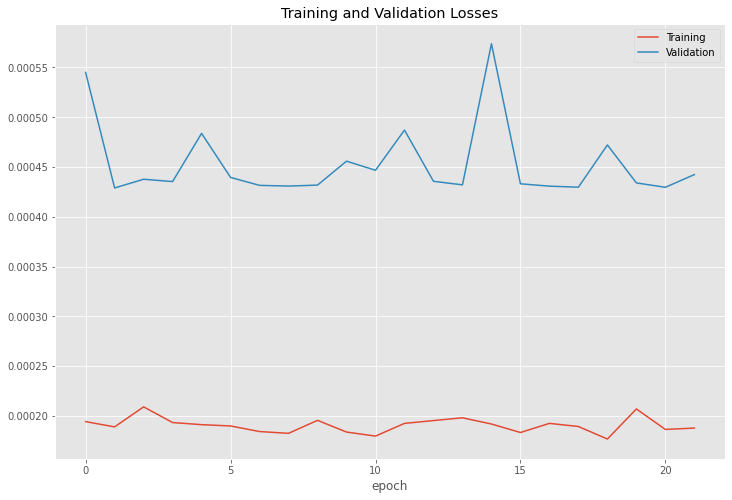

In [ ]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

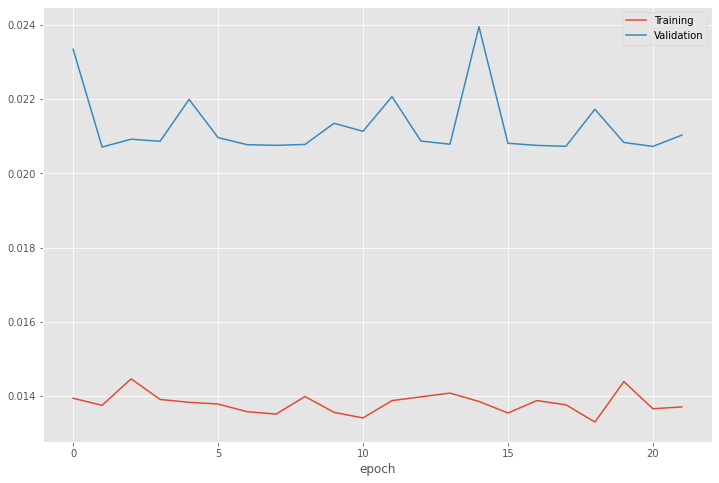

In [ ]:
# Plot graph between training and validation accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

In [ ]:
# loading the best perfoming model
model = keras.models.load_model('/content/model_0.0004290.h5')

# Make Predictions on the entire dataset
predicted_cpu_usage = model.predict(X)
predicted_cpu_usage


array([[[0.00365774],
        [0.00383854]],

       [[0.00173613],
        [0.00180623]],

       [[0.00451123],
        [0.00413901]],

       ...,

       [[0.00344432],
        [0.00299497]],

       [[0.00387115],
        [0.00421107]],

       [[0.00387115],
        [0.00421107]]], dtype=float32)

In [ ]:
# Append the predicted values into a list
predicted = []
for i in predicted_cpu_usage:
  predicted.append(i[0][0])
print(len(predicted))
print(predicted) 

10367
[0.0036577396, 0.0017361306, 0.0045112297, 0.0049378574, 0.0030173995, 0.0040845387, 0.0019497387, 0.0032308847, 0.0025904179, 0.0040845387, 0.0049378574, 0.0034443215, 0.003871154, 0.007282721, 0.0036577396, 0.0040845387, 0.0032308847, 0.0036577396, 0.003871154, 0.0034443215, 0.0036577396, 0.005151119, 0.0049378574, 0.0034443215, 0.003871154, 0.005151119, 0.003871154, 0.0055776276, 0.003871154, 0.0057908185, 0.003871154, 0.003657747, 0.0036577396, 0.003871154, 0.005364388, 0.0049378574, 0.0040845387, 0.003871154, 0.0036577396, 0.0045112297, 0.0036577396, 0.0034443215, 0.0040845387, 0.004724562, 0.0034443215, 0.0040845387, 0.0055776276, 0.005151119, 0.0040845387, 0.007282721, 0.0019497387, 0.0036577396, 0.0030173995, 0.0036577396, 0.0036577396, 0.003871154, 0.0036577396, 0.0036577396, 0.0055776276, 0.0055776276, 0.003871154, 0.0030173995, 0.0006678365, 0.003657747, 0.0036577396, 0.0049378574, 0.003871154, 0.0049378574, 0.003871154, 0.003871154, 0.0055776276, 0.0049378574, 0.00387

In [ ]:
# Get R^2 Score on the entire dataset
from sklearn.metrics import r2_score

print("R^2: ", r2_score(y, predicted))

R^2:  0.9975957553677316


In [ ]:
# Get the RMSE on the test set
from sklearn.metrics import mean_squared_error
predicted_test_set = model.predict(X_test)
y_pred = []
for i in predicted_test_set:
  y_pred.append(i[0][0])
print(len(y_pred))
print(y_pred) 

print("RMSE on test set: ", np.sqrt(mean_squared_error(y_test, y_pred)))

2592
[0.00429789, 0.005364388, 0.0021633096, 0.0057908185, 0.002376873, 0.005364388, 0.0034443215, 0.0036577396, 0.0034443215, 0.005151119, 0.0036577396, 0.0034443215, 0.003871154, 0.004724562, 0.0055776276, 0.0040845387, 0.0025904179, 0.0040845387, 0.0036577396, 0.0017361306, 0.0015225187, 0.0015225187, 0.0019497387, 0.0028039142, 0.00429789, 0.0062172003, 0.0036577396, 0.0055776276, 0.008560676, 0.006856587, 0.0040845685, 0.003871154, 0.0040845387, 0.00429789, 0.003871154, 0.003871154, 0.003871154, 0.0070696585, 0.00429789, 0.00429789, 0.003871154, 0.0057908185, 0.00429789, 0.0055776276, 0.0034443215, 0.005364388, 0.003871154, 0.004724562, 0.00429789, 0.0057908185, 0.00429789, 0.0034443215, 0.0021633096, 0.00429789, 0.11824226, 0.0055776276, 0.0040845387, 0.0057908185, 0.003871154, 0.0049378574, 0.003871154, 0.0064303353, 0.003657747, 0.0008815415, 0.0028039142, 0.005151119, 0.003871154, 0.0034443215, 0.00429789, 0.0055776276, 0.0034443215, 0.0049378574, 0.003871154, 0.0055776276, 0.

In [ ]:
# # Append the original cpu usage values to the list
# orig = []
# for i in scaled_data:
#   orig.append(i[-1])
# len(orig)

10367

In [ ]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = new_data[["Timestamp"]]
df_predicted

Timestamp
0      04.01.2016 00:00:00
1      04.01.2016 00:05:00
2      04.01.2016 00:10:00
3      04.01.2016 00:15:00
4      04.01.2016 00:20:00
...                    ...
10362  08.02.2016 23:30:00
10363  08.02.2016 23:35:00
10364  08.02.2016 23:40:00
10365  08.02.2016 23:45:00
10366  08.02.2016 23:50:00

[10367 rows x 1 columns]

In [ ]:
# Add the close values to the dataframe
df_predicted["Actual CPU Utilized"] = close
df_predicted

Timestamp  Actual CPU Utilized
0      04.01.2016 00:00:00             0.002213
1      04.01.2016 00:05:00             0.004829
2      04.01.2016 00:10:00             0.005231
3      04.01.2016 00:15:00             0.003421
4      04.01.2016 00:20:00             0.004427
...                    ...                  ...
10362  08.02.2016 23:30:00             0.005030
10363  08.02.2016 23:35:00             0.003823
10364  08.02.2016 23:40:00             0.004225
10365  08.02.2016 23:45:00             0.004225
10366  08.02.2016 23:50:00             0.005433

[10367 rows x 2 columns]

In [ ]:
# Add the predicted values to the dataframe
df_predicted["Prediction"] = predicted
df_predicted

Timestamp  Actual CPU Utilized  Prediction
0      04.01.2016 00:00:00             0.002213    0.003658
1      04.01.2016 00:05:00             0.004829    0.001736
2      04.01.2016 00:10:00             0.005231    0.004511
3      04.01.2016 00:15:00             0.003421    0.004938
4      04.01.2016 00:20:00             0.004427    0.003017
...                    ...                  ...         ...
10362  08.02.2016 23:30:00             0.005030    0.005791
10363  08.02.2016 23:35:00             0.003823    0.004725
10364  08.02.2016 23:40:00             0.004225    0.003444
10365  08.02.2016 23:45:00             0.004225    0.003871
10366  08.02.2016 23:50:00             0.005433    0.003871

[10367 rows x 3 columns]

In [ ]:
# Plot the results
interactive_plot2(df_predicted, "Original vs. Predictions")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
